In [0]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

#Prediccion logistica
---

In [0]:
x=np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5,
4.75, 5, 5.5]).reshape(-1,1)
y=np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [0]:
regresion_logistica=LogisticRegression()
regresion_logistica.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
x_nuevo = np.array([1,2,3,4,5,6]).reshape(-1,1)
prediccion = regresion_logistica.predict(x_nuevo)
probabilidades_prediccion = regresion_logistica.predict_proba(x_nuevo)
print(probabilidades_prediccion)
print(probabilidades_prediccion[:,1])
probabilidades_prediccion = regresion_logistica.predict_proba(x_nuevo)

[[0.87984046 0.12015954]
 [0.69895285 0.30104715]
 [0.42402118 0.57597882]
 [0.18924992 0.81075008]
 [0.06891381 0.93108619]
 [0.02293029 0.97706971]]
[0.12015954 0.30104715 0.57597882 0.81075008 0.93108619 0.97706971]


#Algoritmo Support Vector Machine
---

In [0]:
#dividir en hiperplanos los datos
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

In [0]:
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

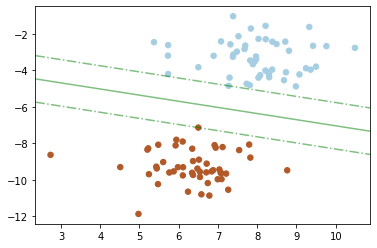

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
#establecer ejes
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#limites y escalas
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
#distribuir datos
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#ajuste de desicion
Z = clf.decision_function(xy).reshape(XX.shape)
#caracteristicas
ax.contour(XX, YY, Z, colors='g', levels=[-1, 0, 1], alpha=0.5, linestyles=['-.', '-', '-.'])
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
plt.show()